c:\users\yulya\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
c:\users\yulya\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


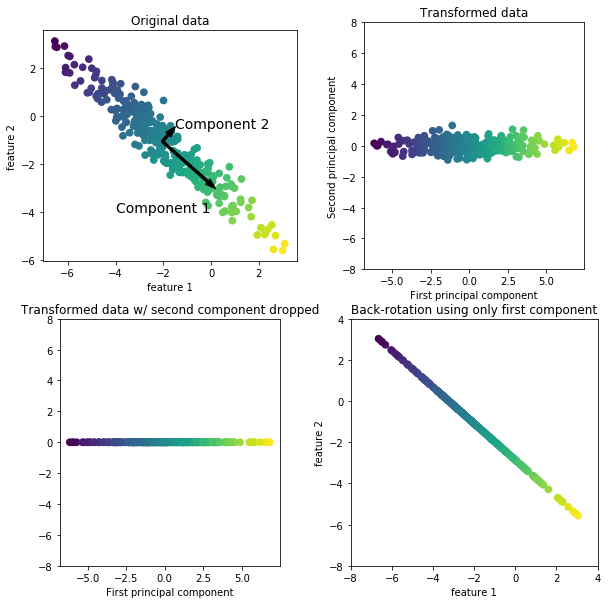

In [1]:
import mglearn
mglearn.plots.plot_pca_illustration()

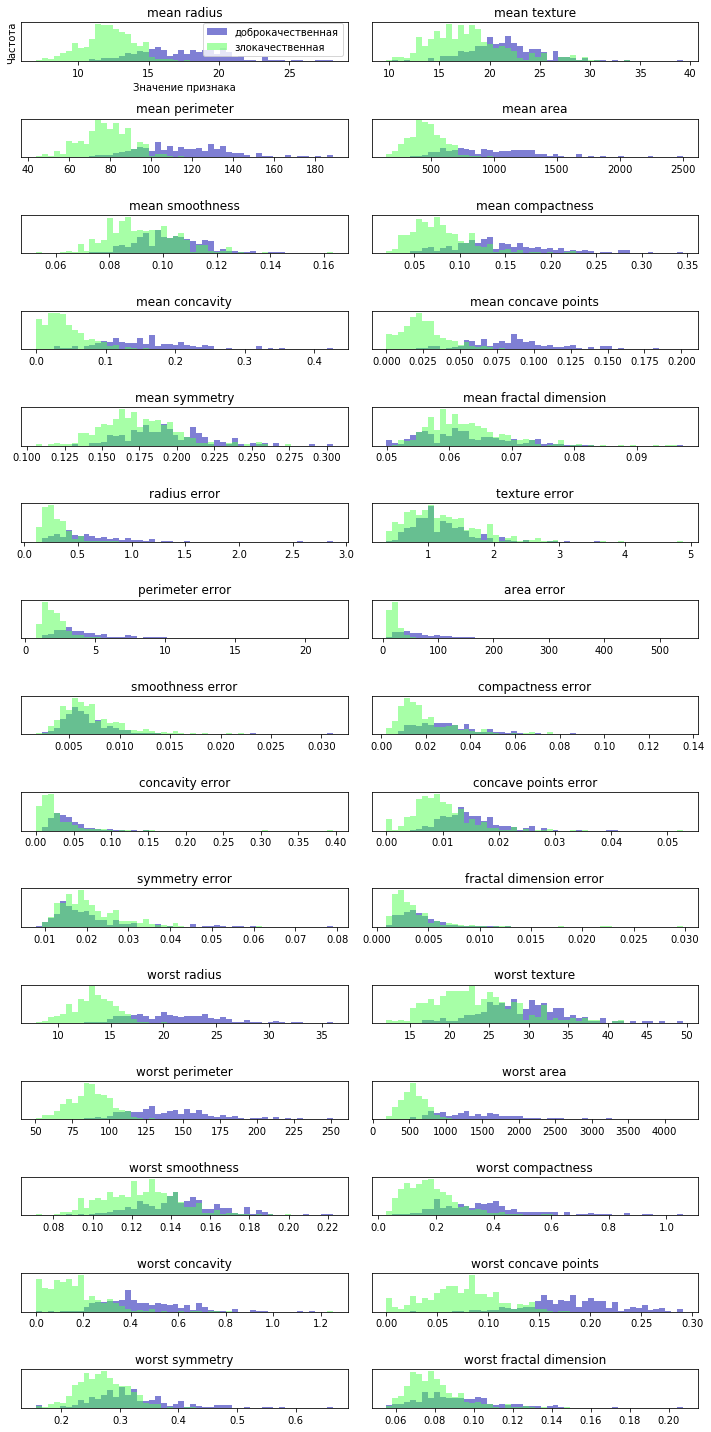

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_breast_cancer

cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
 ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
160
ax[0].legend(["доброкачественная", "злокачественная"], loc="best")
fig.tight_layout()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [9]:
from sklearn.decomposition import PCA
# оставляем первые две главные компоненты
pca = PCA(n_components=2)
#  подгоняем  модель  PCA  на  наборе  данных  breast  cancer
pca.fit(X_scaled)
# преобразуем данные к первым двум главным компонентам
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


Text(0, 0.5, 'Вторая главная компонента')

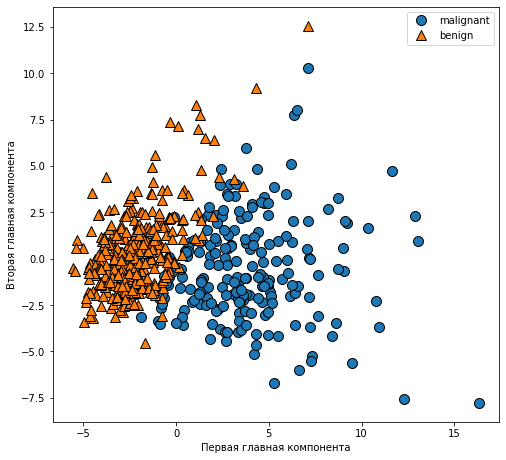

In [10]:
#  строим  график  первых  двух  главных  компонент,  классы  выделены  цветом
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target) 
plt.legend(cancer.target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента") 
plt.ylabel("Вторая главная компонента")

In [11]:
print("форма главных компонент: {}".format(pca.components_.shape))

форма главных компонент: (2, 30)


In [12]:
print("компоненты PCA:\n{}".format(pca.components_))

компоненты PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Главные компоненты')

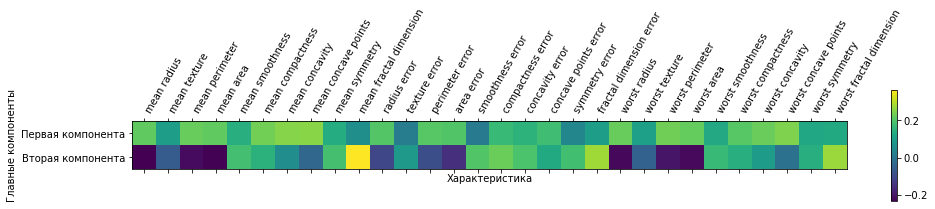

In [14]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Первая компонента", "Вторая компонента"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Характеристика") 
plt.ylabel("Главные компоненты")

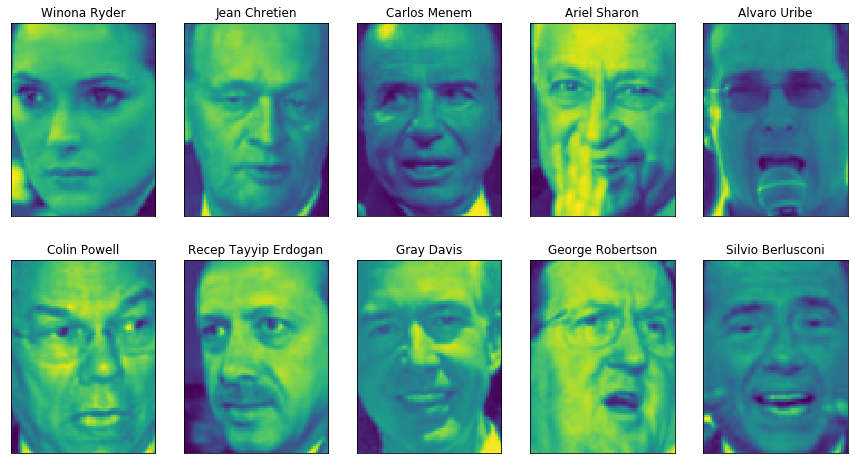

In [15]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])

In [16]:
print("форма массива изображений лиц: {}".format(people.images.shape))
print("количество классов: {}".format(len(people.target_names)))

форма массива изображений лиц: (3023, 87, 65)
количество классов: 62


In [19]:
# вычисляем частоту встречаемости каждого ответа
counts = np.bincount(people.target)
# печатаем частоты рядом с ответами
for i, (count, name) in enumerate(zip(counts, people.target_names)):
 print("{0:25} {1:3}".format(name, count), end=' ')
 if (i + 1) % 3 == 0:
     print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [20]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# для получения большей стабильности масштабируем шкалу оттенков серого так, чтобы значения
# были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
X_people = X_people / 255.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# строим KNeighborsClassifier с одним соседом
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Правильность на тестовом наборе для 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе для 1-nn: 0.23


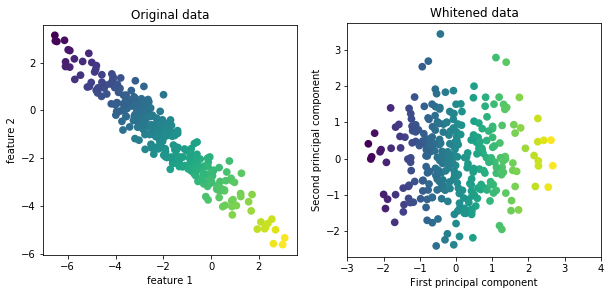

In [23]:
mglearn.plots.plot_pca_whitening()

In [24]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("обучающие данные после PCA: {}".format(X_train_pca.shape))

обучающие данные после PCA: (1547, 100)


In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test_pca, y_test)))

Правильность на тестовом наборе: 0.31


In [26]:
print("форма pca.components_: {}".format(pca.components_.shape))

форма pca.components_: (100, 5655)


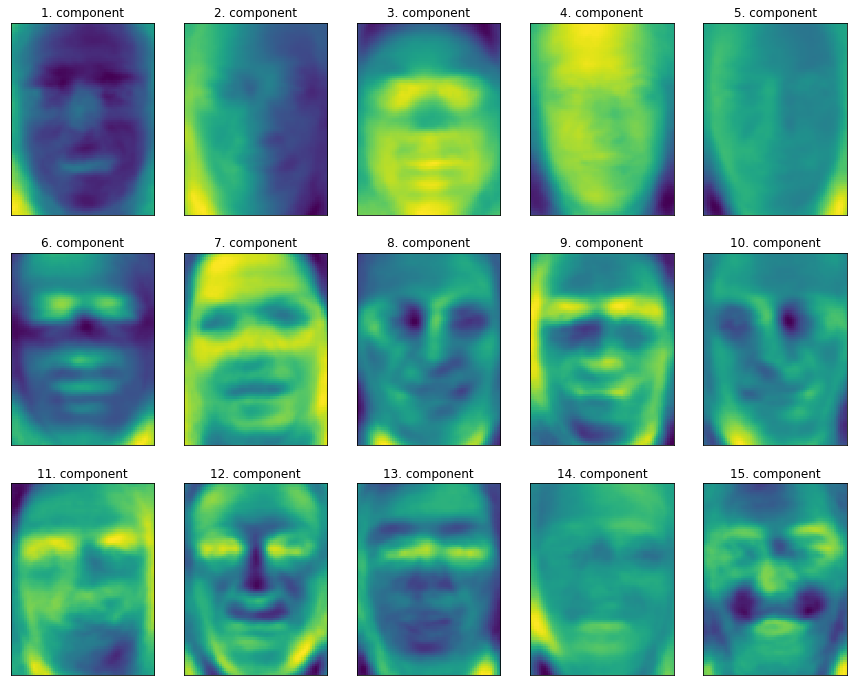

In [27]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),cmap='viridis')
 ax.set_title("{}. component".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 3.6s, 0.1min


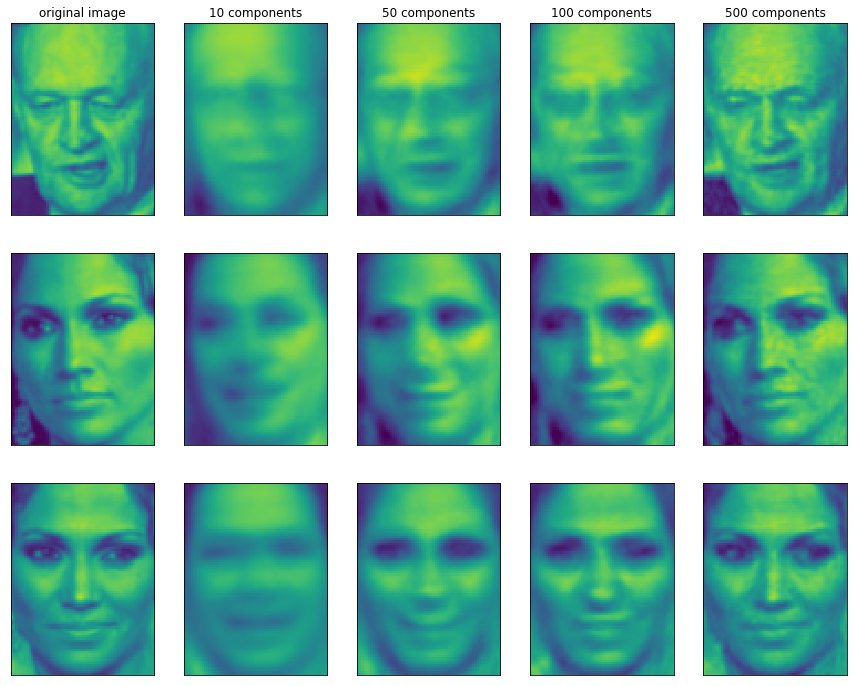

In [28]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Вторая главная компонента')

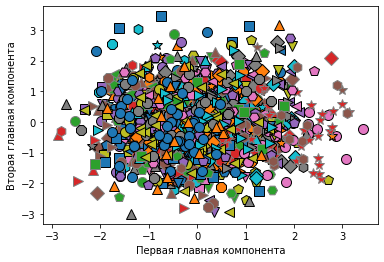

In [29]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train) 
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")